# Øving 3, TMA4320

**Veiledning**: Onsdagene 08.03 og 15.03 kl. 16:15-18:00 i R50, Realfagsbygget, og torsdagene 09.03 og 16.03 i 14:15-16:00 i rom 265 SB1.  
**Innlevering**: Mandag 20.03 kl. 23:59, i [ovsys](https://ovsys.math.ntnu.no).

Oppgaven skal innleveres som et Jupyternotat. Men gjør gjerne implementering og koding i Spyder eller et annet IDE, og kopier den ferdige koden inn i Jupyternotatet for innlevering.

**NB!** Før innlevering: 
* Kjør en runde på hele notatet for å se at alt virker: <tt>Kernel -> Restart & Run All</tt>
* Deretter: <tt>Kernel -> Restart & Clear Output</tt>. Fila er nå klar for innlevering. 

$\newcommand{mb}[1]{\mathbf{#1}}$
$\newcommand{R}{\mathbb{R}}$
    

In [13]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
plt.rcParams.update(newparams)

### Oppgave 1
Gitt differensialligningen
$$
y' = ty^2, \qquad y(0)=1. 
$$
skal løses over intervallet $0\leq t \leq 0.4$.

**(a)** Finn den eksakte løsningen av ligningen

**(b)** Gjør 4 steg med Eulers metode med steglengde $h=0.1$. Beregn feilen i endepunktet.

**(c)** Gjør 2 steg med Heun's metode med steglengde $h=0.2$. Beregn igjen feilen i endepunktet. 

**(d)** Gjør et steg med RK4. Beregn feilen i endepunktet. 

I alle disse tilfellene er det brukt 4 funksjonsevalueringer for å finne en tilnærmelse til løsningen $y(0.4)$. Hvem av metodene ga et mest nøyaktig resultat? 


### 1a
Eksakt løsning:
\begin{align*}
\frac{dy}{dt} &= ty^2 \\
\frac{1}{y^2}dy &= t dt \\
-\frac{1}{y} &= \frac{1}{2}t^2 + C \\
\end{align*}
Med $y(0)=1$ får vi
\begin{align}
y(t) = \frac{1}{1-\frac{1}{2}t^2}
\end{align}

### 1b-1d

In [14]:
def f(t, y):
    return t * y ** 2

def y(t):
    return 1 / (1 - 0.5*t**2)

t0, t_end = 0., .4
y0 = 1.
y_end = y(t_end)

# Implementing solvers
def euler_step(f, tn, yn, h):
    return tn + h, yn + h * f(tn, yn)

def heun_step(f, tn, yn, h):
    k1 = f(tn, yn)
    k2 = f(tn+h, yn+h*k1)
    return tn + h, yn + 0.5 * h * (k1 + k2)

def rk4_step(f, tn, yn, h):
    k1 = f(tn, yn)
    k2 = f(tn+0.5*h, yn+0.5*h*k1)
    k3 = f(tn+0.5*h, yn+0.5*h*k2)
    k4 = f(tn+h, yn+h*k3)
    return tn+h, yn + (h/6) * (k1 + 2*k2 + 2*k3 + k4)

def solve(f, t0, tend, steps, y0, step_method, all=False):
    t, y = t0, y0
    h = (tend - t0) / steps

    if all:
        y_arr = []
        t_arr = []

    for _ in range(steps):
        t, y = step_method(f, t, y, h)

        if all:
            y_arr.append(y)
            t_arr.append(t)

    if not all:
        return t, y
    else:
        return np.asarray(t_arr), np.asarray(y_arr)

In [15]:
_, y_euler = solve(f, t0, t_end, 4, y0, euler_step)
err_euler = np.abs(y_end - y_euler)
print(f'Error with Eulers method: {err_euler:.2e}')

Error with Eulers method: 2.47e-02


In [16]:
_, y_heun = solve(f, t0, t_end, 2, y0, heun_step)
err_heun = np.abs(y_end - y_heun)
print(f'Error with Heuns method: {err_heun:.2e}')

Error with Heuns method: 1.07e-03


In [17]:
_, y_rk4 = solve(f, t0, t_end, 1, y0, rk4_step)
err_rk4 = np.abs(y_end - y_rk4)
print(f'Error with RK4: {err_rk4:.2e}')

Error with RK4: 3.40e-05


Vi ser at med like mange funksjonsberegninger er RK4 den metoden som gir lavest global feil. Heun kommer son nummer to, og Euler som nummer tre. Vi ser at feilen minker raskt (omtrent en størrelsesorden mellom hver metode).

### Oppgave 2

Følgende Runge-Kutta metode er gitt ved sitt Butcher-tableau:
$$
\begin{array}{c|ccc}
  0 & 0 \\
  1/3 & 1/3 \\
  2/3 & 0 & 2/3 \\ \hline
      & 1/4 & 0 & 3/4 
\end{array}
$$

**(a)** Bestem metodens orden. 

Orden 1:
\begin{align*}
\Sigma_i b_i &= \frac{1}{4} + \frac{3}{4} = 1
\end{align*}

Orden 2:
\begin{align*}
\Sigma_i b_i c_i &= \frac{3}{4}\times\frac{2}{3} = \frac{1}{2}
\end{align*}

Orden 3:
\begin{align*}
\Sigma_i b_i c_i^2 &= \frac{3}{4} \times \left( \frac{2}{3} \right)^2 = \frac{1}{3} \\
\Sigma_{ij} b_i a_{ij} c_j &= \frac{3}{4} \times \frac{2}{3} \times \frac{1}{3} = \frac{1}{6}
\end{align*}

Orden 4:
\begin{align*}
\Sigma_i b_i c_i^3 &= \frac{3}{4} \times \left( \frac{2}{3} \right)^3 = \frac{2}{9} \neq \frac{1}{4}
\end{align*}
Dermed er metoden av orden 3.

**(b)** Verifiser metodens orden numerisk. Du kan bruke testligningen fra Oppgave 1. 

In [18]:
N_arr = np.arange(1, 10)
h_arr = (t_end - t0) / N_arr
err_arr = []

def rk_step(f, tn, yn, h):
    k1 = f(tn, yn)
    k2 = f(tn+(1/3)*h, yn+h*(1/3)*k1)
    k3 = f(tn+(2/3)*h, yn+h*(2/3)*k2)
    return tn + h, yn + k1 / 4 + k3 * 3 / 4

for i, (N, h) in enumerate(zip(N_arr, h_arr)):
    _, y_n = solve(f, t0, t_end, N, y0, rk_step)
    err = np.abs(y_end - y_n)
    err_arr.append(err)

[-2.05949351 -0.90638059 -0.20658904  0.38088883  0.95386625  1.57637692
  2.32185302  3.30862244  4.77272977]
Order p: 3.1094788186675952


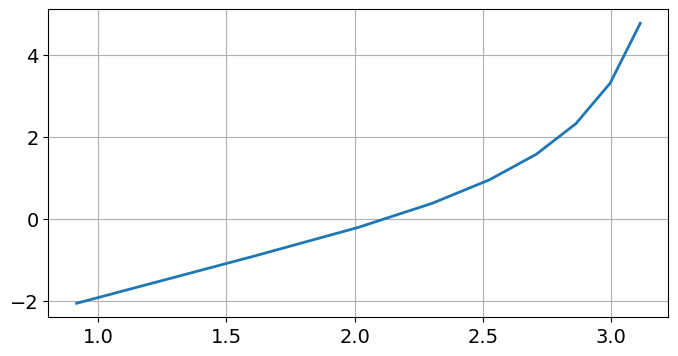

In [19]:
log_err = np.log(err_arr)
log_h = np.abs(np.log(h_arr))
print(log_err)
p = (log_err[-1] - log_err[0]) / (log_h[-1] - log_h[0])
print(f'Order p: {p}')
plt.plot(log_h, log_err)
plt.show()

### Oppgave 3
Duffing-ligningen er en mye studert matematisk modell, som beskriver en tynn, bøyelig metallstav som svinger i nærheten av en elektromagnet. Ligningen er gitt ved

$$
u''+ku' - u(1-u^2)=A\cos(\omega t).
$$

**(a)** Skriv om ligningen til et system av differensialligninger. 

La $x_1 = u´$ og $x_2 = u$. Da er 
\begin{align*}
x_1´ &= A\cos\omega t - k x_1 + x_2(1-x_2^2) \\
x_2´&= x_1
\end{align*}

I det resterende kan du bruke parameterne $k=0.25$, $A=0.4$, $\omega = 1.0$, $u(0)=0$, $u'(0)=0$

**(b)** Gjør et steg med Heuns metode. Bruk steglengde $h=0.1$.

**(c)** Løs ligningen numerisk ved hjelp av Heuns metode. Du kan ta utgangspunkt i koden <tt>ode.py</tt>, som du kan finne på forelesningsplanen. Bruk $h=0.01$, og integrer fram til $t_{\text{end}}=100$. Plott begge løsningskomponentene som en funksjon av $t$. Vis deretter løsningen som et faseplott ($u$ på $x$-aksen, $u'$ på $y$-aksen). 

Eksprimenter gjerne med litt ulike startverdier og parameterverdier, men bruk verdiene som er oppgitt i innleveringen.

**(d)** Løs ligningen over samme intervall som du brukte i **(c)**, men nå med <tt> scipy</tt>'s <tt>solve_ivp</tt>. Løs ligningene med litt ulike toleranser (<tt>atol</tt> og <tt>rtol</tt>), og se hva som skjer. 

Duffing-oscillatoren er et eksempel på et kaotisk system. Små endringer kan føre til ganske store endringer i løsningen, men løsningene holder seg likevel innenfor nogenlunde samme område. 



In [20]:
# Startbetingelser
k = 0.25
A = 0.4
w = 1.0
u0 = 0
u_prime_0 = 0

# System av diff.lign.
def f(t, x):
    x1, x2 = x
    return np.asarray((A*np.cos(w*t) - k*x1 + x2*(1 - x2 ** 2), x1))

# 3b
t, y = solve(f, t0=0, tend=0.1, steps=1, y0=(u0, u_prime_0), step_method=heun_step)

# 3c
t, u = solve(f, t0=0, tend=100, steps=10_000, y0=(u0, u_prime_0), step_method=heun_step, all=True)

Text(0.5, 1.0, 'Heun')

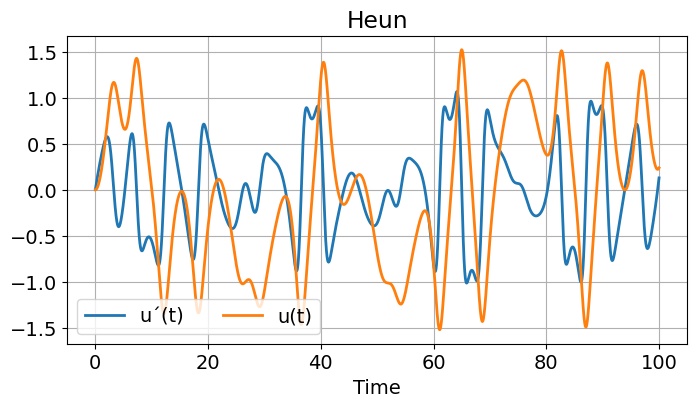

In [21]:
plt.plot(t, u)
plt.legend(['u´(t)', 'u(t)'], loc='lower left', ncol=2)
plt.xlabel('Time')
plt.title('Heun')

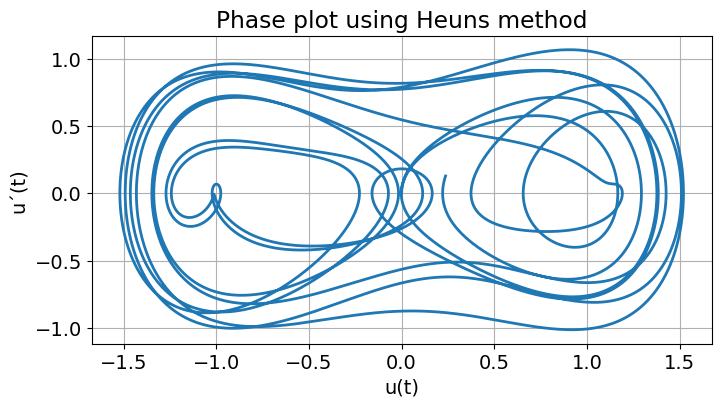

In [22]:
plt.plot(u[:,1], u[:,0])
plt.title('Phase plot using Heuns method')
plt.xlabel('u(t)')
plt.ylabel('u´(t)')
plt.show()

Text(0.5, 0, 'Time')

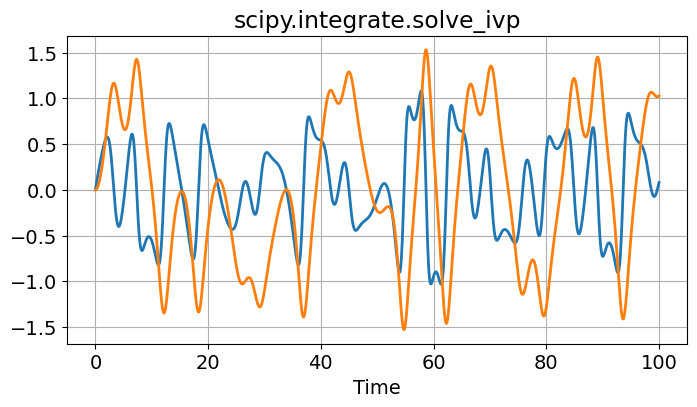

In [23]:
from scipy.integrate import solve_ivp
sol = solve_ivp(f, (0, 100), (0, 0), vectorized=True, atol=1e-8, rtol=1e-10)
t = sol.t
u = sol.y

plt.plot(t, u[0])
plt.plot(t, u[1])
plt.title('scipy.integrate.solve_ivp')
plt.xlabel('Time')

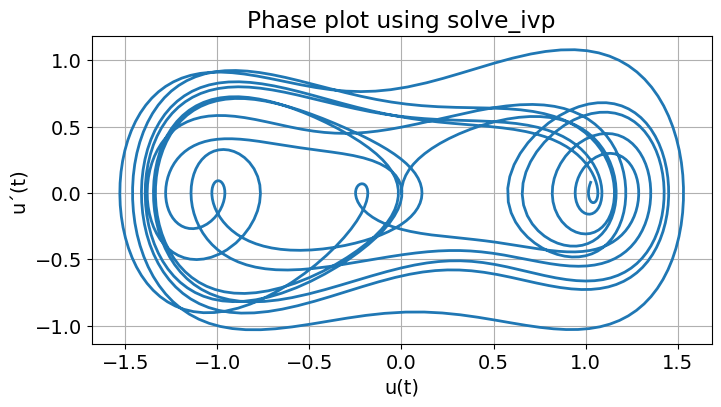

In [24]:
plt.plot(u[1], u[0])
plt.title('Phase plot using solve_ivp')
plt.xlabel('u(t)')
plt.ylabel('u´(t)')
plt.show()